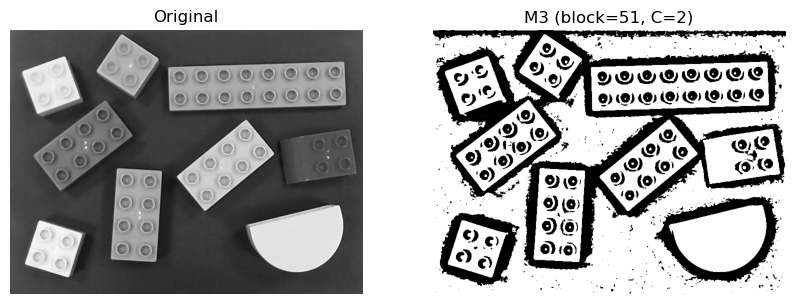

In [8]:
import cv2, numpy as np, matplotlib.pyplot as plt

path_img = "../images/lego01.jpg"

# 1) ler em cinzento
img_gray = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)

# 2) (opcional) suavizar ligeiramente para reduzir ruído
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)

# 3) threshold adaptativo local (M3)
#    - blockSize: tamanho da vizinhança (ímpar, p.ex. 31, 41, 51, 61)
#    - C: constante subtraída (ajusta a agressividade; começa em 2–5)
blockSize = 51
C = 2
m3 = cv2.adaptiveThreshold(
    img_blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,   # usa THRESH_BINARY_INV se quiseres peças=255
    blockSize, C
)

# 4) mostrar
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_gray, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(m3, cmap='gray'); plt.title(f'M3 (block={blockSize}, C={C})'); plt.axis('off')
plt.show()
